In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [2]:
df = pd.read_csv('manufacturing_defect_dataset.csv')
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [3]:
df.shape

(3240, 17)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64

In [6]:
df.dtypes

ProductionVolume          int64
ProductionCost          float64
SupplierQuality         float64
DeliveryDelay             int64
DefectRate              float64
QualityScore            float64
MaintenanceHours          int64
DowntimePercentage      float64
InventoryTurnover       float64
StockoutRate            float64
WorkerProductivity      float64
SafetyIncidents           int64
EnergyConsumption       float64
EnergyEfficiency        float64
AdditiveProcessTime     float64
AdditiveMaterialCost    float64
DefectStatus              int64
dtype: object

In [8]:
df.describe(include='all')

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [9]:
X = df.drop(columns= 'DefectStatus', axis = 1)
y = df['DefectStatus']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
def evaluate_model(y_test, predictions):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
    print('Classification Report:\n', classification_report(y_test, predictions))

In [23]:
log_model = LogisticRegression(C=0.5,penalty='l1', solver = 'liblinear', tol=0.0001)
log_model.fit(X_train, y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [24]:
log_predictions = log_model.predict(X_test)

In [22]:
log_grid.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [25]:
evaluate_model(y_test, log_predictions)

Accuracy: 0.88
Precision: 0.90
Recall: 0.97
F1 Score: 0.93
Confusion Matrix:
 [[ 41  61]
 [ 19 527]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.40      0.51       102
           1       0.90      0.97      0.93       546

    accuracy                           0.88       648
   macro avg       0.79      0.68      0.72       648
weighted avg       0.86      0.88      0.86       648



In [29]:
forest = RandomForestClassifier(max_features='log2', n_estimators=60)
forest.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=60)

In [30]:
forest_prediction = forest.predict(X_test)

In [31]:
evaluate_model(y_test, forest_prediction)

Accuracy: 0.96
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
Confusion Matrix:
 [[ 79  23]
 [  6 540]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648



In [21]:
def plot_confusion_matrix(y_test, predictions, model_name):
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Defects', 'High Defects'], yticklabels=['Low Defects', 'High Defects'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [33]:
def plot_roc_curve(y_test, predictions_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, predictions_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

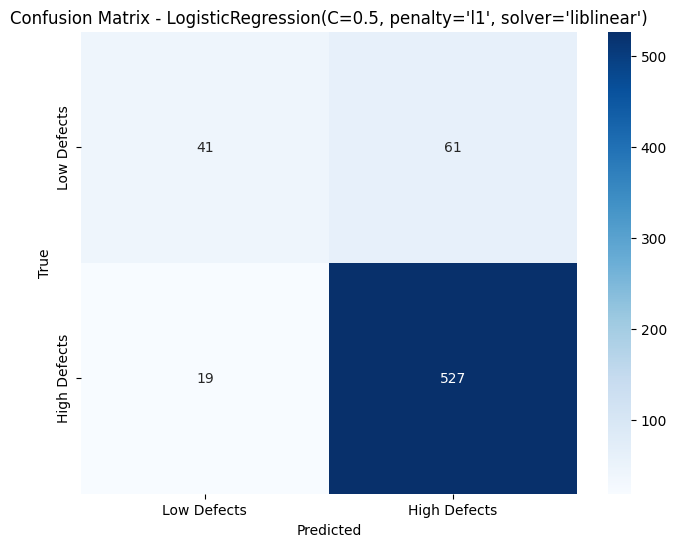

In [26]:
plot_confusion_matrix(y_test, log_predictions, log_model)

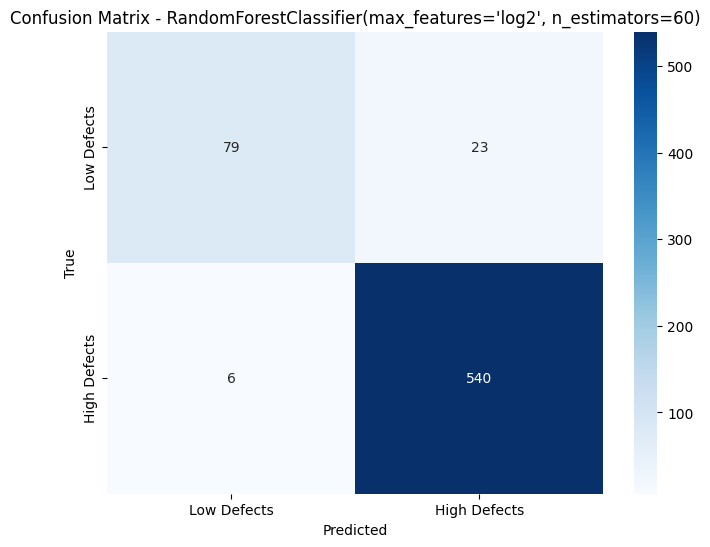

In [32]:
plot_confusion_matrix(y_test, forest_prediction, forest)

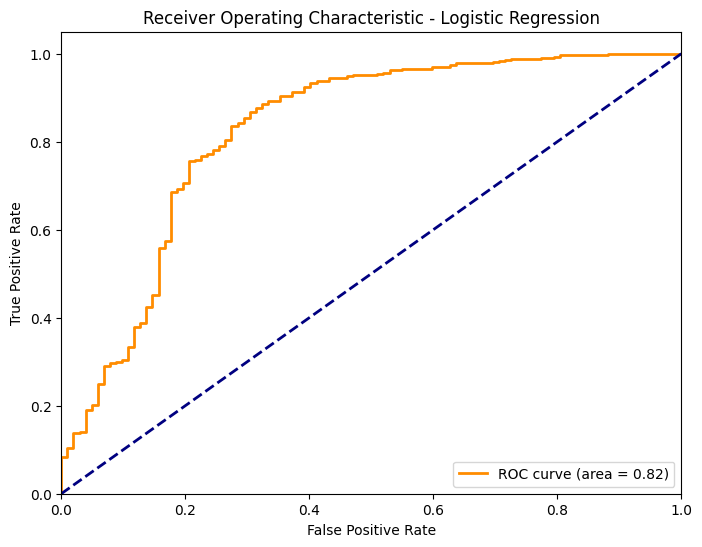

In [37]:
plot_roc_curve(y_test, log_model.predict_proba(X_test)[:,1], 'Logistic Regression')

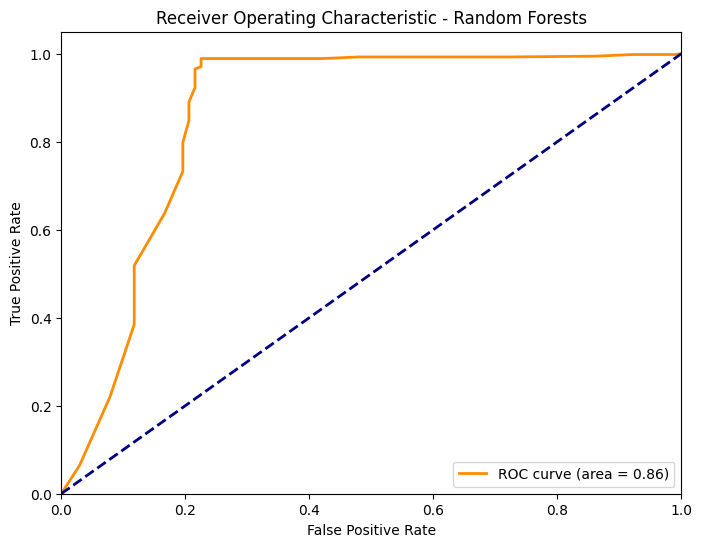

In [38]:
plot_roc_curve(y_test, forest.predict_proba(X_test)[:,1], 'Random Forests')

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [40]:
history = model.fit(X_train, y_train, batch_size=32, epochs = 100, validation_data=[X_test,y_test])

Epoch 1/100


81/81 [==============================] - 1s 3ms/step - loss: 0.5211 - accuracy: 0.7643 - val_loss: 0.3701 - val_accuracy: 0.8426
Epoch 2/100
81/81 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8387 - val_loss: 0.3483 - val_accuracy: 0.8426
Epoch 3/100
81/81 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8383 - val_loss: 0.3405 - val_accuracy: 0.8472
Epoch 4/100
81/81 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8526 - val_loss: 0.3340 - val_accuracy: 0.8735
Epoch 5/100
81/81 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8584 - val_loss: 0.3285 - val_accuracy: 0.8796
Epoch 6/100
81/81 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8607 - val_loss: 0.3244 - val_accuracy: 0.8827
Epoch 7/100
81/81 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8615 - val_loss: 0.3217 - val_accuracy: 0.8873
Epoch 8/100